In [1]:
library(dplyr)
library(ggplot2)
library(lubridate)
library(tidyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
bats_pigments <- read.delim("bats_pigments.txt", skip = 50, sep = "", header = TRUE, row.names = NULL, na.strings = "-999")
bats_pigments$Phae[bats_pigments$Phae == -999] <- NA
bats_pigments$Phae[bats_pigments$Chl == -999.000] <- NA
bats_pigments

Id,yyyymmdd,decy,time,latN,lonW,QF,Depth,p1,p2,⋯,p12,p13,p14,p15,Chl,Phae,p18,p19,p20,p21
<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1000108112,19881021,1988.803,455,31.833,64.167,2,1.0,NA,NA,⋯,NA,NA,NA,NA,0.048,NA,NA,NA,NA,NA
1000108111,19881021,1988.803,455,31.833,64.167,2,10.0,NA,NA,⋯,NA,NA,NA,NA,0.048,NA,NA,NA,NA,NA
1000108110,19881021,1988.803,455,31.833,64.167,2,25.0,NA,NA,⋯,NA,NA,NA,NA,0.059,NA,NA,NA,NA,NA
1000108109,19881021,1988.803,455,31.833,64.167,2,50.0,NA,NA,⋯,NA,NA,NA,NA,0.062,NA,NA,NA,NA,NA
1000108108,19881021,1988.803,455,31.833,64.167,2,100.0,NA,NA,⋯,NA,NA,NA,NA,0.134,NA,NA,NA,NA,NA
1000108107,19881021,1988.803,455,31.833,64.167,2,150.0,NA,NA,⋯,NA,NA,NA,NA,0.047,NA,NA,NA,NA,NA
1000108106,19881021,1988.803,455,31.833,64.167,2,200.0,NA,NA,⋯,NA,NA,NA,NA,0.012,NA,NA,NA,NA,NA
1000108105,19881021,1988.803,455,31.833,64.167,2,225.0,NA,NA,⋯,NA,NA,NA,NA,0.008,NA,NA,NA,NA,NA
1000108104,19881021,1988.803,455,31.833,64.167,2,250.0,NA,NA,⋯,NA,NA,NA,NA,0.007,NA,NA,NA,NA,NA


In [3]:
write.csv(bats_pigments, file = "bats_pigments.csv", row.names = FALSE)

In [63]:
bats_pigments <- bats_pigments %>% arrange(Depth)
head(bats_pigments)

,Id,yyyymmdd,decy,time,latN,lonW,QF,Depth,p1,p2,⋯,p12,p13,p14,p15,Chl,Phae,p18,p19,p20,p21
,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,1003500312,19910812,1991.613,1912,31.749,64.136,2,0.5,0,0,⋯,3,0,13,0,0.021,0.000,NA,NA,NA,NA
2,2001800112,19900402,1990.251,1532,32.133,64.677,2,0.6,0,0,⋯,NA,15,124,0,0.081,NA,NA,32,NA,NA
3,1003400112,19910715,1991.536,1553,32.769,64.157,2,0.6,0,0,⋯,4,0,24,0,0.022,0.005,NA,NA,NA,NA
4,1008700301,19951215,1995.955,1236,31.638,64.118,2,0.7,2,0,⋯,32,17,146,11,0.134,0.015,1,32,8,3
5,2001600211,19900131,1990.084,1636,31.909,64.239,2,0.7,0,0,⋯,NA,0,60,0,0.048,NA,0,29,NA,NA
6,3003000312,19910405,1991.259,1532,31.683,64.289,2,0.9,10,0,⋯,11,10,114,0,0.134,0.040,NA,NA,NA,NA


In [5]:
bats_dates <- bats_pigments %>% mutate(yyyymmdd = as.character(yyyymmdd), Date = as.Date(yyyymmdd, format = "%Y%m%d"), Month = month(Date, label = TRUE))

In [64]:
bats_pigments <- bats_pigments %>% arrange(desc(p14))
bats_pigments
result <- bats_dates %>% filter(p14 == 1148)
result

Id,yyyymmdd,decy,time,latN,lonW,QF,Depth,p1,p2,⋯,p12,p13,p14,p15,Chl,Phae,p18,p19,p20,p21
<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1025600806,20100325,2010.229,1555,31.615,64.146,2,18.9,35,NA,⋯,NA,102,1148,NA,0.896,0.243,6,19,33,27
2029100101,20130327,2013.235,1732,31.660,64.175,2,5.3,127,NA,⋯,19,145,1031,31,0.916,0.205,NA,NA,NA,NA
2009100210,19960423,1996.310,1255,31.631,64.212,2,59.9,35,0,⋯,41,157,933,33,0.866,0.384,2,40,15,19
2029100105,20130327,2013.235,1732,31.660,64.175,2,20.1,177,NA,⋯,17,132,877,31,1.101,0.205,NA,NA,NA,NA
1008200316,19950711,1995.525,1304,31.684,64.240,2,121.8,40,0,⋯,24,170,823,40,0.574,0.185,0,25,23,18
1008200314,19950711,1995.525,1304,31.684,64.240,2,100.7,105,0,⋯,29,157,817,45,1.147,0.661,0,30,24,22
2029100109,20130327,2013.235,1732,31.660,64.175,2,57.8,138,NA,⋯,14,135,794,27,0.780,0.205,NA,NA,NA,NA
1026800309,20110427,2011.319,1421,31.681,64.175,2,60.4,133,NA,⋯,NA,251,701,NA,0.653,0.244,0,29,12,26
1016400312,20020514,2002.366,1322,31.695,64.216,2,79.6,26,24,⋯,48,150,700,21,0.573,0.304,NA,NA,NA,NA


Id,yyyymmdd,decy,time,latN,lonW,QF,Depth,p1,p2,⋯,p14,p15,Chl,Phae,p18,p19,p20,p21,Date,Month
<dbl>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,⋯,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<date>,<ord>
1025600806,20100325,2010.229,1555,31.615,64.146,2,18.9,35,NA,⋯,1148,NA,0.896,0.243,6,19,33,27,2010-03-25,Mar


In [7]:
climatology <- bats_dates %>% group_by(Month) %>% summarise(across(starts_with("p"), \(x) mean(x, na.rm = TRUE)))

In [8]:
climatology

Month,p1,p2,p3,p4,p5,p6,p7,p8,p9,⋯,p11,p12,p13,p14,p15,Phae,p18,p19,p20,p21
<ord>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Jan,7.716216,4.6763485,15.221622,0.9972973,16.80811,5.027027,34.60541,1.5621622,5.329730,⋯,0.7621622,20.10092,24.60811,133.36757,9.972973,0.04852174,0.5950000,23.87500,5.456522,4.3043478
Feb,12.493421,14.5275591,23.799342,1.3273026,23.90954,8.082237,50.56743,4.2203947,7.325658,⋯,1.0016447,21.87086,30.54441,181.80757,9.925532,0.05342331,1.0437018,24.02244,5.662338,5.5389610
Mar,12.069733,9.4591346,23.465875,2.5445104,22.73145,11.284866,49.78635,3.9213650,8.022255,⋯,1.1053412,16.43280,24.59792,169.74926,7.907051,0.06723090,0.9747706,22.07798,4.195531,5.3296089
Apr,10.268636,4.6625310,17.240506,2.0981767,21.19495,9.165498,40.06732,2.5173370,6.707351,⋯,0.8460472,17.31329,21.07906,128.57559,7.659159,0.06894167,0.8638211,18.92248,3.627907,5.1279070
May,9.897872,1.6666667,12.087234,2.5190678,18.78390,6.529661,33.87076,1.7309322,4.902542,⋯,0.5932203,13.41546,26.19492,106.99576,7.322368,0.07759296,0.6277603,17.36170,4.117647,3.5764706
Jun,9.098280,0.7850877,12.250614,2.6117936,17.03931,5.213759,29.69287,1.2407862,4.837838,⋯,0.6142506,13.24444,27.49877,99.13022,7.697201,0.04888728,0.5186567,17.35714,5.692308,2.5384615
Jul,8.684327,3.4396552,12.768212,2.1302428,15.21720,6.380645,28.11183,1.2030905,4.926882,⋯,0.6843267,19.33480,30.35484,101.34194,9.151448,0.06061275,0.6936937,20.22609,5.572519,2.6412214
Aug,7.405195,0.3315508,9.953247,2.0623377,14.17884,4.214106,27.31738,0.9272727,4.561713,⋯,0.6753247,16.52688,29.87909,95.20655,9.826772,0.06739024,0.6172414,21.86424,4.338983,4.1779661
Sep,8.412301,2.8711111,10.580866,1.4168565,13.31042,3.760532,25.92018,0.8451025,4.290466,⋯,0.6036446,20.33505,32.91796,100.90244,10.373874,0.05795856,0.4159021,22.79941,5.644444,2.1333333


In [23]:
climatology <- bats_dates %>% group_by(Month) %>% summarise(across(starts_with("p"), \(x) mean(x, na.rm = TRUE))) %>% pivot_longer(cols = starts_with("p"), names_to = "Pigment", values_to = "Mean_Concentration")
climatology

Month,Pigment,Mean_Concentration
<ord>,<chr>,<dbl>
Jan,p1,7.71621622
Jan,p2,4.67634855
Jan,p3,15.22162162
Jan,p4,0.99729730
Jan,p5,16.80810811
Jan,p6,5.02702703
Jan,p7,34.60540541
Jan,p8,1.56216216
Jan,p9,5.32972973


In [10]:
pigment_table <- data.frame(Pigment = c("p1", "p2", "p3", "p4", "p5", "p6", "p7", "p8", "p9", "p10", "p11", "p12", "p13", "p14", "p15", "Chl", "Phae", "p18", "p19", "p20", "p21"),
    Full_name = c("Chlorophyll c3", 
        "Chlorophyllide a", 
        "Chlorophyll c1+c2", 
        "Peridinin", 
        "19-Butanoyloxyfucoxanthin", 
        "Fucoxanthin", 
        "19-Hexanoyloxyfucoxanthin", 
        "Prasinoxanthin", 
        "Diadinoxanthin", 
        "Alloxanthin", 
        "Diatoxanthin", 
        "Zeaxanthin+lutein", 
        "Chlorophyll b", 
        "Chlorophyll a", 
        "a+b Carotene", 
        "Turner Chlorophyll a", 
        "Turner Phaeopigments", 
        "Lutein", 
        "Zeaxanthin", 
        "a-Carotene", 
        "b-Carotene"))

In [11]:
write.csv(pigment_table, "pigment_table.csv", row.names = FALSE)

In [12]:
climatology <- merge(climatology, pigment_table, by = "Pigment", all.x = TRUE)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


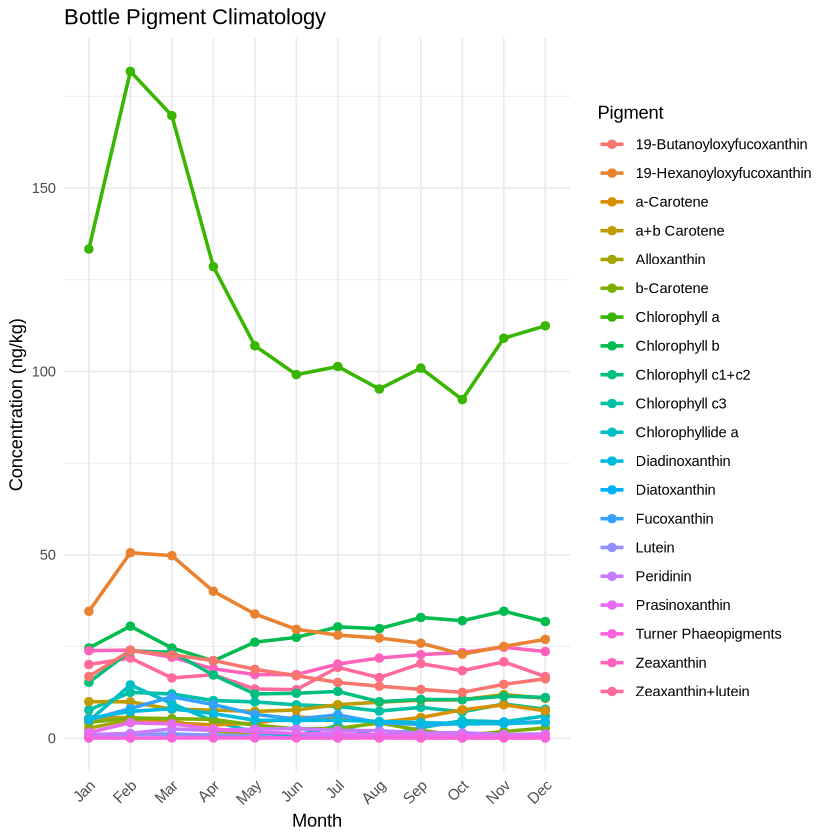

In [13]:
ggplot(climatology, aes(x = Month, y = Mean_Concentration, color = Full_name, group = Pigment)) +
  geom_line(size = 1) +
  geom_point(size = 2) +
  labs(title = "Bottle Pigment Climatology",
       x = "Month",
       y = "Concentration (ng/kg)",
       color = "Pigment") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [69]:
surface <- bats_dates %>% filter(Depth < 50) %>% pivot_longer(cols = starts_with("p"), names_to = "Pigment", values_to = "Concentration")
surface_2018_2023 <- surface %>% filter(Date >= as.Date("2018-01-01") & Date <= as.Date("2023-12-31"))

In [72]:
surface <- bats_dates %>% filter(Depth < 50)
surface_2018_2023 <- surface %>% arrange(desc(p14)) %>% filter(Date >= as.Date("2018-01-01") & Date <= as.Date("2023-12-31"))
surface_2018_2023

Id,yyyymmdd,decy,time,latN,lonW,QF,Depth,p1,p2,⋯,p14,p15,Chl,Phae,p18,p19,p20,p21,Date,Month
<dbl>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,⋯,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<date>,<ord>
1037801207,20210214,2021.123,1911,31.567,64.174,2,39.8,0,NA,⋯,470,20,0.497,0.195,1,70,NA,NA,2021-02-14,Feb
1038802107,20211214,2021.953,1610,31.653,64.218,2,40.6,39,NA,⋯,347,28,0.361,0.068,0,83,NA,NA,2021-12-14,Dec
1037700702,20210125,2021.068,1823,31.667,64.178,2,6.1,26,NA,⋯,298,19,0.302,0.097,0,57,NA,NA,2021-01-25,Jan
1037700706,20210125,2021.068,1823,31.667,64.178,2,21.0,26,NA,⋯,297,18,0.312,0.097,0,52,NA,NA,2021-01-25,Jan
1038802105,20211214,2021.953,1610,31.653,64.218,2,20.2,30,NA,⋯,296,23,0.302,0.059,0,91,NA,NA,2021-12-14,Dec
1037700704,20210125,2021.068,1823,31.667,64.178,2,10.9,30,NA,⋯,294,19,0.302,0.078,1,46,NA,NA,2021-01-25,Jan
1037700708,20210125,2021.068,1823,31.667,64.178,2,41.4,39,NA,⋯,289,18,0.302,0.097,0,60,NA,NA,2021-01-25,Jan
1037801205,20210214,2021.123,1911,31.567,64.174,2,19.6,0,NA,⋯,269,17,0.283,0.088,2,84,NA,NA,2021-02-14,Feb
1035501306,20190112,2019.032,1710,31.651,64.236,2,19.7,24,NA,⋯,230,19,0.234,0.049,1,44,NA,NA,2019-01-12,Jan


Warning message:
“Removed 517 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 545 rows containing missing values or values outside the scale range
(`geom_point()`).”


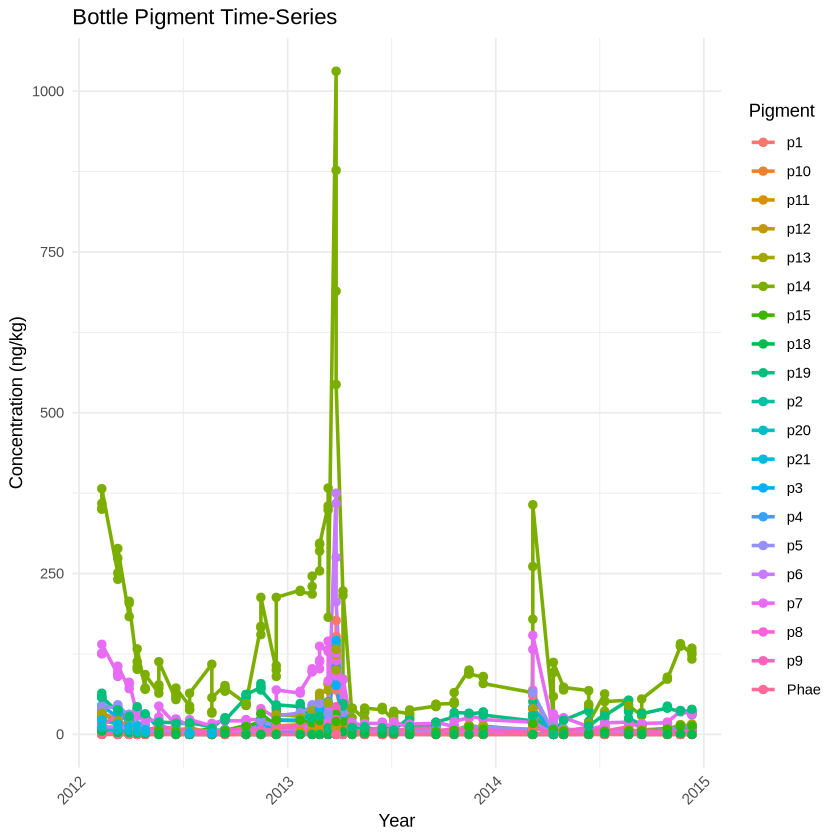

In [68]:
ggplot(surface_2018_2014, aes(x = Date, y = Concentration, color = Pigment, group = Pigment)) +
  geom_line(size = 1) +
  geom_point(size = 2) +
  labs(title = "Bottle Pigment Time-Series",
       x = "Year",
       y = "Concentration (ng/kg)",
       color = "Pigment") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))